# Univariate plotting with pandas
在这个section中，我们学习基础的pandas的功能，从最简单的单变量可视化或者一元可视化开始。
这些基础的工具包括bars plots和line charts.通过这些，我们能够更好的理解pandas画图库的结构，并集花费一些时间来解释数据的格式。


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
# 如果没有加这一句，需要使用plt.show()显示图片
%matplotlib inline 


In [13]:
df_reviews = pd.read_csv('../dataSet/winemag-data_first150k.csv',index_col=0) 

df_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# Bar charts(条形图) and categorical data
Bar charts 是最简单的数据可视化。从本数据出发，我们可视化省份对应的数据。统计每个类别出现的次数，并作图显示。例如，早餐中消费的鸡蛋的数量和吃早餐的人的数量基本相当；在我们的数据中，世界上生产wine的省份与它们生产的wine的标签基本也相当。


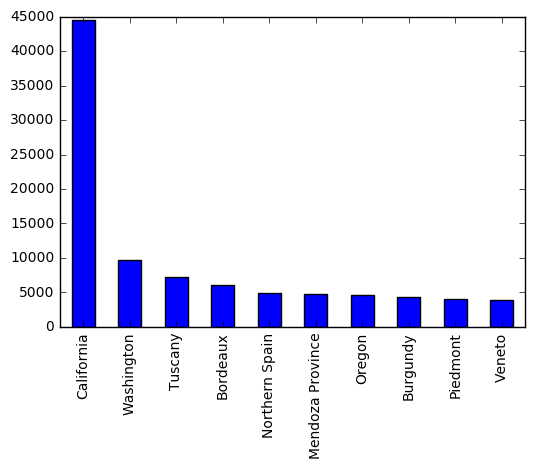

In [8]:
# 显示最多的次数的前10个做出bar图
df_reviews['province'].value_counts().head(10).plot.bar()


作图是为了更好的理解数据。这个图告诉我们什么呢？它说，California生产的wine比其他城市更多。这还不够鲜明，我们更好的是显示比例的图例。
很简单，每一个个数除以总个数即可：

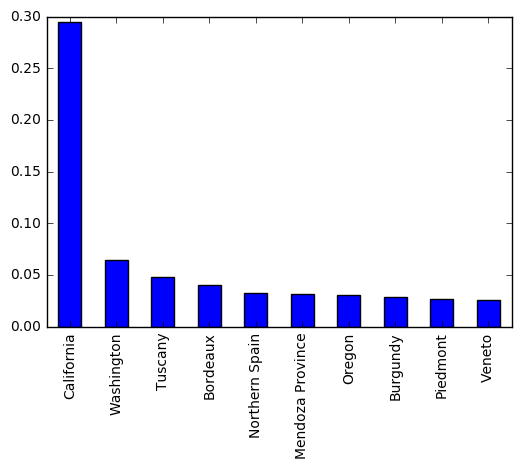

In [14]:
(df_reviews['province'].value_counts().head(10) / len(df_reviews)).plot.bar()

在wine杂志上的wine，California生产的wine占1/3.
Bar charts是灵活的图表：可以表示任何的类别，而且高度可以表示任何的长度(只要是数字)，每一个bar表示任何的类别。
上面的类别表示是原始的纯粹的分类，它的前后顺序是没有意义的，例如国家，邮政编码，象棋类型等都没有先后的顺序；但是有的
类别是有先后顺序的，例如地震的等级大小，公寓包含的房子个数，超市中薯片的袋子的大小。
在我们的数据中，我们可以看一下wine杂志对所有wine的打分：


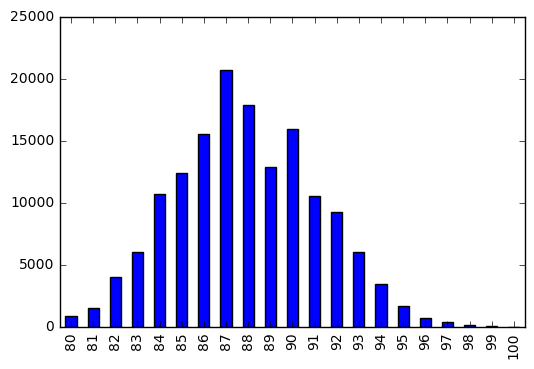

In [15]:
df_reviews['points'].value_counts().sort_index().plot.bar()

正如你看到的那样，所有的分数集中在80-100之间，而且我们如果相信wine杂志是一个好的评论者，我们可以任务得分92的wine比得分91的wine更好。

# Line Charts(折线图)
在上面的例子中，我们有20中不同的打分，可以用bar charts表示，但是如果我们的分值在0-100之间，就会有100个柱，这对一些出现次数少的是不合适的，于是我们可以使用 line Chart 代替 bar chart。


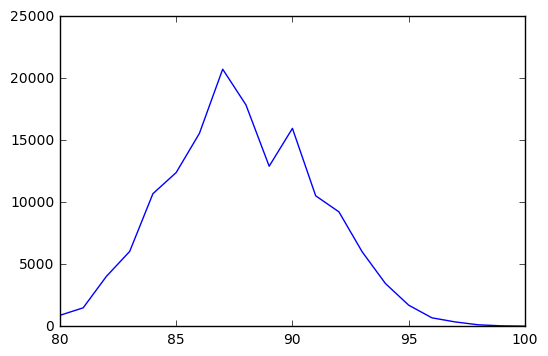

In [16]:
df_reviews['points'].value_counts().sort_index().plot.line()

A line chart(折线图)可以传递任何单独的值，它是具有许多单一的值和类别时的首选方案。
折线图的弱点：
+ 不像条形图，它不在能表示随意的类别，在水平坐标上必须是有序的。而且折线图中下降并不代表任何意义(至少在本例子中是)。
+ 折线图更难区分不同值
+ 一般而言，建议使用bat chart(条形图)

# 练习：条形图或折线图

我们做一个快速的练习，假设我们对下面的变量感兴趣, 选择使用更合适的图表表示：
+ Problem：
    1. 有5中不同的口味，同意不同口味的购买的数量。
    2. 从美国所有汽车制造商购买的汽车的平均数。
    3. 0-100之间，在测试中学生的的得分。
    4. 在一个城市中每一个街道的餐馆的数量。
+ Answer:
    1. bar chart
    2. bar chart
    3. line chart
    4. bar chart


# Area Charts
Area chars是由折线图下面的阴影部分的面积组成。
在一个变量的情况下，区域图和折线图基本是相似的，二者可以互换。


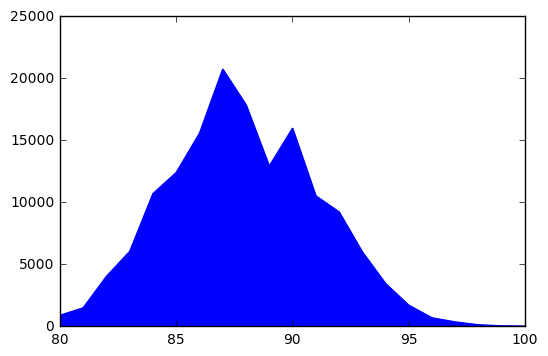

In [17]:
df_reviews['points'].value_counts().sort_index().plot.area()


# 区间数据(Interval data)
首先看一个区间变量的例子：飓风中的风速，海水的温度，太阳的温度等等。区间数据在分类数据之上，它是有顺序的，它的值之间的差是有意义的。例如水的温度在之前是-20摄氏度，后来变成了120摄氏度。那么他们之前的差值140是有意义的，表示温度的差值。例如在我们的例子中，points对应的数据，92的分数比89的分数的评测高3分是有意义的。
折线图(line chart)在区间数据上是可以工作的，但是条形图(bar chart)就不可以，我们可以应用新的工具，柱状图(histgram).

使用价格< 200的数据进行作图。

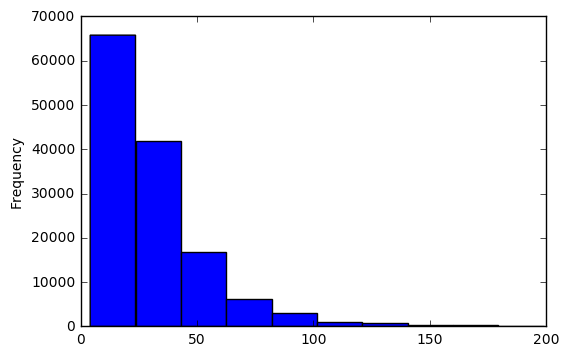

In [20]:
df_reviews[df_reviews['price']<200]['price'].plot.hist()

上面的柱状图中，我们可以看到它和条形图很相似。事实上，这就是条形图的一种，只是条形图表示的单一的值，柱状图表示的区间数据。长度都表示个数。
但是柱状图的缺点很明显，因为它要分割数据区间，但是它不能很好的处理峰值。这就是我为什么选择小于200的进行作图。如果我们使用所有的数据进行作图，就会显示出来所有的数据对应的个数，但是图形为了显示后面的数据，就毁坏了前面数据的精度。

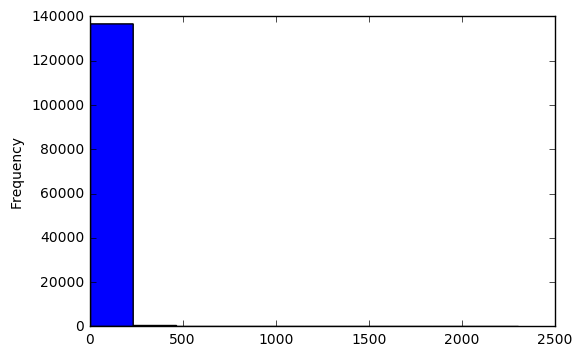

In [21]:
df_reviews['price'].plot.hist()

对于上述这种问题，我们需要手动选择数据，之后进行显示，例如我们可以选择出价格price > 1500的之后，再进行显示。就行我们选择小于200的价格显示是一样的道理。我们的原则就是手动选择避免峰值。    
对于类别的变量，柱状图也可以工作的很好。


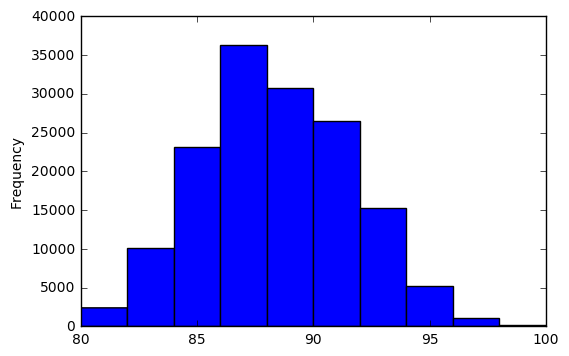

In [24]:
df_reviews['points'].plot.hist()

# 练习: bar, line/area, or histgram
对于下面的问题选择更好的显示类型：
+ Problem:
    1. 苹果园中每个类型苹果的采摘的数量?
    2. 一个赛季NBA所有比赛的得分？
    3. 芝加哥每栋楼包含的公寓的个数？
+ Answer:
    1. 我们可以知道这是一个分类的数据，最好使用Bar chart(条形图)
    2. NBA没场比赛的分数在50-180之间，我们可以适用于line chart,或者是用bar chart, 或者histgram
    3. 每一栋楼有的公寓的数目可能在1-1000之间，这是一个区间数据，我们最后使用histgram(柱状图)表示


# 总结和练习
到这里我们已经学习了单变量的四种表示方法，分别是bar chart,line chart, area chart, histgram.    
下面我们使用Pokemon数据做些练习。


In [30]:
df_pokemon = pd.read_csv('../dataSet/pokemon.csv')

# df_pokemon.info()
df_pokemon.head()


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


+ Problem
    1. pokemon种类type的频率(类别类型，使用bar chart)
    2. pokemon的HP的频率(数字，而且单一值太多，使用 line)
    3. pokemon重量的分布频率(区间数据，使用 histgram)



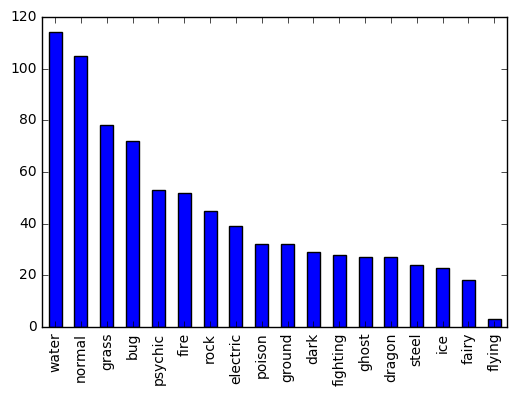

In [33]:
# 1. pokemon种类type的频率，
df_pokemon['type1'].value_counts().plot.bar()


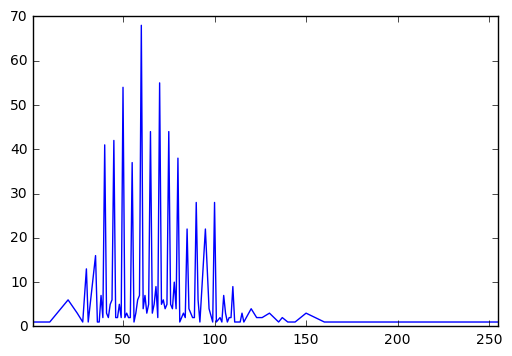

In [38]:
# 2. pokemon的HP的频率
df_pokemon['hp'].value_counts().sort_index().plot.line()

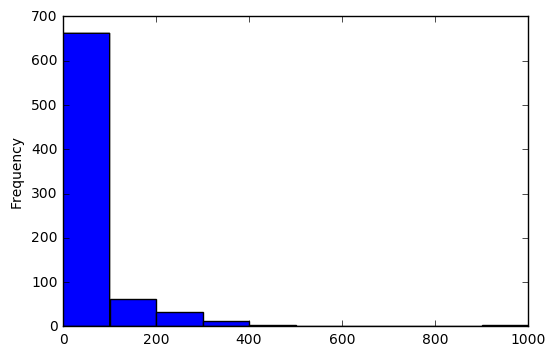

In [39]:
# 3. pokemon重量的分布频率
df_pokemon['weight_kg'].plot.hist()

到这里，你可能认为我们的教程应该要结束了，但是我们还有一个图例没有介绍，就是饼状图。    
在功能在饼状图可以完全被bar chart替代。    
我们使用上面的两个数据例子，来看一下这个饼状图的表示。

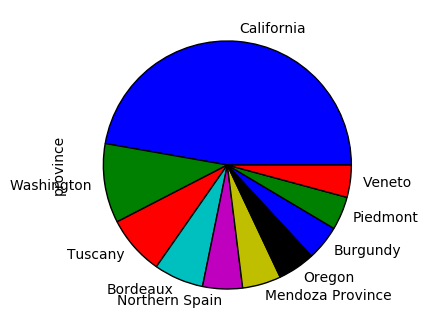

In [46]:
df_reviews['province'].value_counts().head(10).plot.pie()

# 是图形变成圆形，否则是椭圆形
plt.gca().set_aspect('equal')

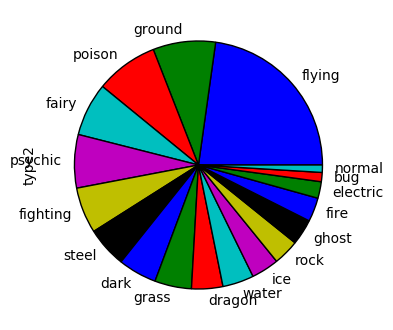

In [48]:
df_pokemon['type2'].value_counts().plot.pie()

plt.gca().set_aspect('equal')

# 参考
原文地址: https://www.kaggle.com/residentmario/univariate-plotting-with-pandas
